# 1. seaborn의 Titanic Data를 활용하여 그래프 그리기

- 정형 데이터는 크게 수치형 데이터와 범주형 데이터로 구분

- 수치형 데이터 : 사칙 연산이 가능한 데이터
   - 1) 연속형 데이터 : 값이 연속된 데이터
        - 키, 몸무게, 수입
   - 2) 이산형 데이터 : 정수로 딱 떨어져 셀 수 있는 데이터
        - 과일 개수, 책의 페이지 
- 범주형 데이터 : 범주를 나눌 수 있는 데이터, 사칙 연산이 불가능한 데이터
   - 1) 순서형 데이터 : 순위를 매길 수 있는 데이터
       - 학점, 순위(랭킹)
   - 2) 명목형 데이터 : 순위가 따로 없는 데이터
       - 성별, 음식 종류, 우편 번호

## 4.2 탐색적 데이터 분석과 그래프
- 그래프를 활용해 데이터가 어떻게 구성돼 있는지, 어떤 피처가 중요한지, 어떤 피처를 제거할지, 어떻게 새로운 피처를 만들지 등 모델링에 필요한 다양한 정보를 얻을 수 있음.

## 4.3 수치형 데이터 시각화
- 수치형 데이터는 일정한 범위 내에서 어떻게 분포되어 있는지가 중요.
- 분포를 알아야 데이터를 어떻게 변환할지, 어떻게 해석해서 활용할지 판단할 수 있음.

In [2]:
# data load
import seaborn as sns
titanic = sns.load_dataset('titanic')

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


- 주요 분포도 함수
   - histplot() : 히스토그램
   - kdeplot() : 커널밀도추정 함수 그래프
   - displot() : 분포도
   - rugplot() : 러그플롯

### 4.3.1 히스토그램(histplot)
- 히스토그램 : 수치형 데이터의 구간별 빈도수를 나타내는 그래프

<Axes: xlabel='age', ylabel='Count'>

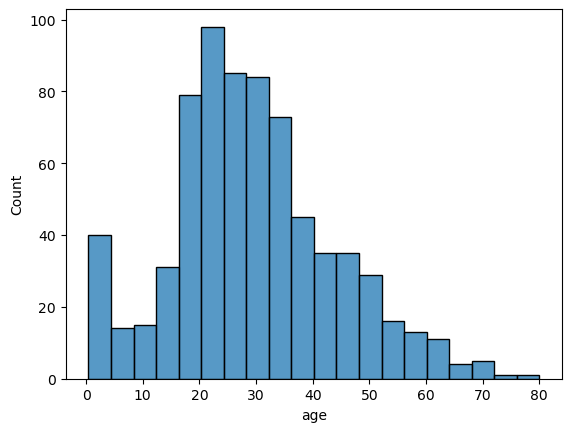

In [4]:
sns.histplot(data=titanic,x='age')
# 나이를 구간별로 나누어, 각 구간에 해당하는 사람이 몇 명인지 나타낸 그래프
# 총 구간은 20개. 구간 개수를 지정하는 bins 파라미터의 기본값이 auto
# 구간을 고정하고 싶다면 bins 선택

<Axes: xlabel='age', ylabel='Count'>

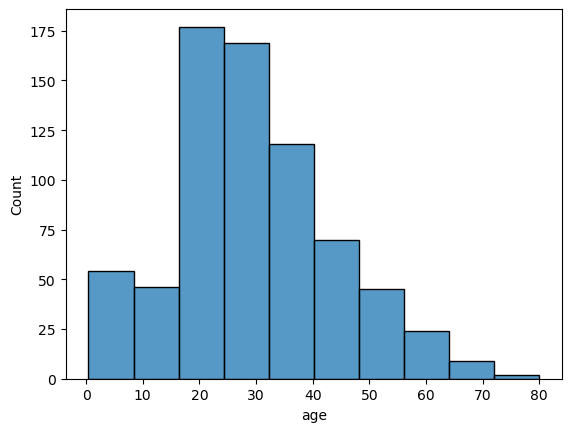

In [6]:
# 구간 10개
sns.histplot(data=titanic,x='age',bins=10)

- 히스토그램은 수치형 데이터 하나에 빈도를 나타냄.

<Axes: xlabel='age', ylabel='Count'>

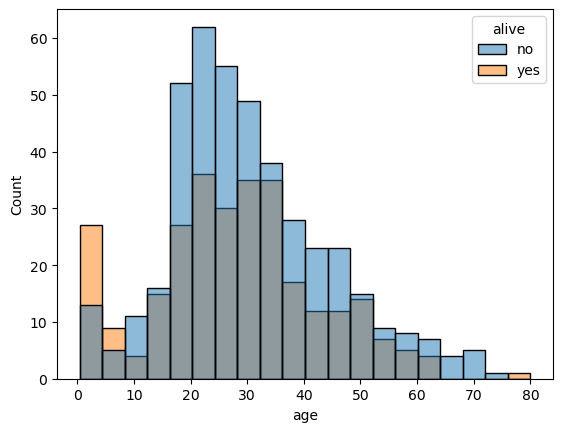

In [8]:
sns.histplot(data=titanic,x='age',hue='alive')

- hue : 범주형 데이터를 전달. 생존여부에 따른 연령 분포를 그려주는 코드.
- 생존자 수 그래프와 사망자 수 그래프를 포개지게 그렸음.
- 포개지 않고 생존자 수와 사망자 수를 누적해 표현하려면 multiple = 'stack' 사용

<Axes: xlabel='age', ylabel='Count'>

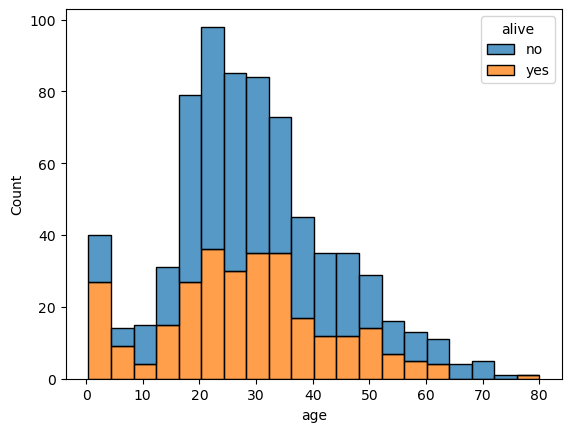

In [9]:
sns.histplot(data=titanic,x='age',hue='alive',multiple='stack')

### 4.3.2 커널밀도추정 함수 그래프(kdeplot)
- 커널밀도추정 함수는 히스토그램을 매끄럽게 곡선으로 연결한 그래프 정도로 이해하면 된다.

<Axes: xlabel='age', ylabel='Density'>

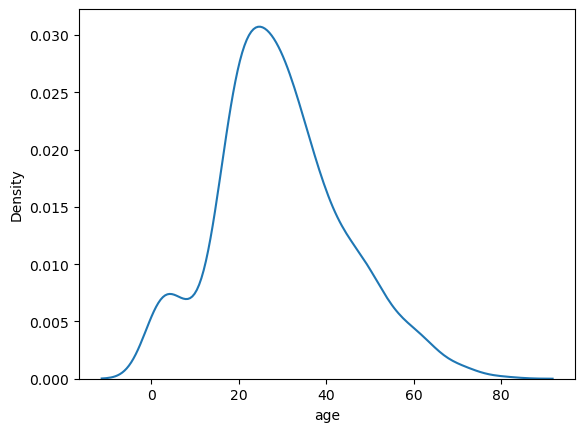

In [10]:
sns.kdeplot(data=titanic,x='age')

- hue = 'alive', multiple='stack'인 경우

<Axes: xlabel='age', ylabel='Density'>

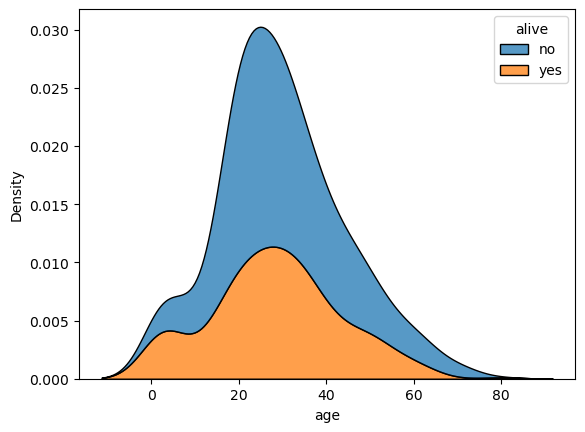

In [11]:
sns.kdeplot(data=titanic, x='age',hue='alive',multiple='stack')

### 4.3.3 분포도(displot)
- 분포도 : 수치형 데이터 하나의 분포를 나타내는 그래프

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


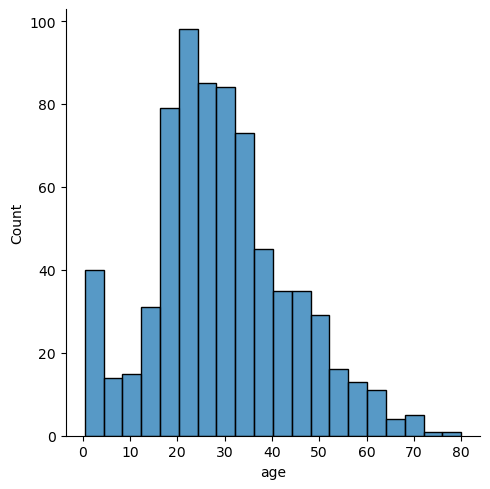

In [12]:
sns.displot(data=titanic,x='age')

- 히스토그램과 비교해보면 크기가 다를 뿐.
- 커널밀도추정 함수 그래프도 그릴 수 있음. kind 파라미터에 'kde'를 전달.

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


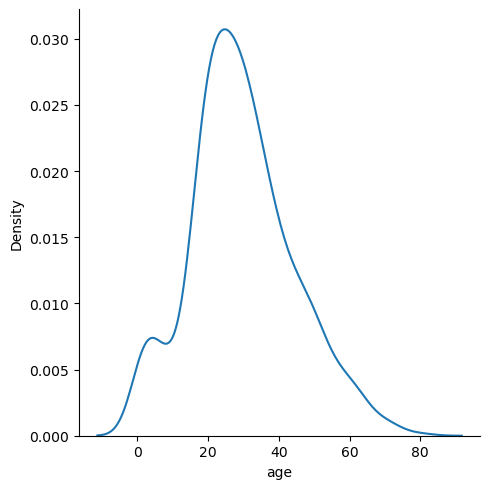

In [14]:
sns.displot(data=titanic,x='age',kind='kde')

- 히스토그램과 커널밀도추정 함수 그래프를 동시에 그릴 수 있음.

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


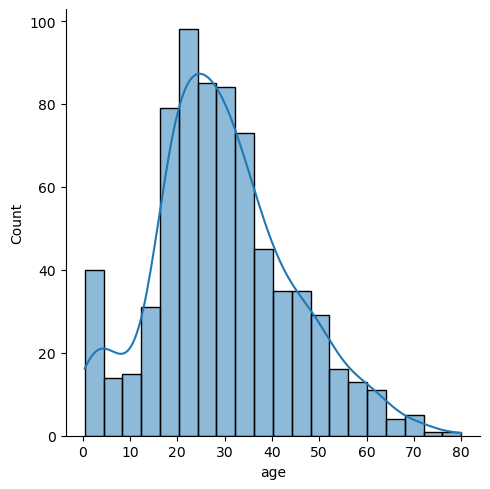

In [15]:
sns.displot(data=titanic,x='age',kde=True)

### 4.3.4 러그플롯(rugplot)
- 러그플롯은 주변 분포를 나타내는 그래프
- 단독으로 사용하기보다는 주로 다른 분포도 그래프와 함께 사용

<Axes: xlabel='age', ylabel='Density'>

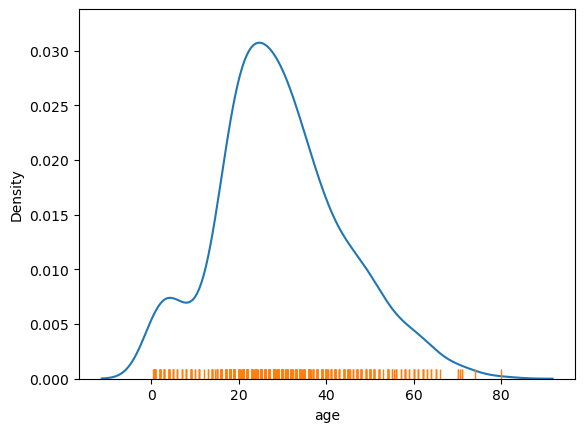

In [16]:
sns.kdeplot(data=titanic, x='age')
sns.rugplot(data=titanic,x='age')

- 러그플롯은 단일 피처가 어떻게 분포돼 있는지를 x축 위에 작은 선분(러그)으로 표시
- 값이 밀집돼 있을수록 작은 선분들도 밀집돼 있음.

## 4.4 범주형 데이터 시각화

### 4.4.1 막대 그래프(barplot)
- 막대 그래프 : 범주형 데이터 값에 따라 수치형 데이터 값이 어떻게 달라지는지 파악할 때 사용.
- barplot은 범주형 데이터에 따른 수치형 데이터의 평균과 신뢰구간을 그려줌.
- 수치형 데이터 평균은 막대 높이로, 신뢰구간은 오차 막대(error bar)로 표현.
- 원본 데이터를 복원 샘플링하여 얻은 표본을 활용해 평균과 신뢰구간을 구하는 것.
- barplot은 원본 데이터 평균이 아니라 샘플링한 데이터 평균
- x 파라미터 : 범주형 데이터, y 파라미터 : 수치형 데이터

<Axes: xlabel='class', ylabel='fare'>

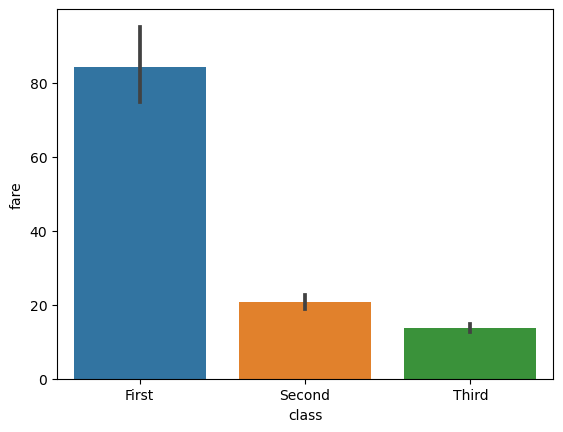

In [17]:
sns.barplot(x='class',y='fare',data=titanic)

- 막대 높이 : 등급별 평균 운임
- 막대 상단의 검은색 세로줄이 오차 막대(신뢰구간)
- 등급이 높을수록 평균 운임이 비싸고 신뢰구간이 넓은 것을 알 수 있음

### 4.4.2 포인트플롯(pointplot)
- 포인트플롯 : 막대 그래프와 모양만 다를 뿐 동일한 정보 제공
- 범주형 데이터에 따른 수치형 데이터의 평균과 신뢰구간을 나타냄
- 그래프를 점과 선으로 나타냄.    

<Axes: xlabel='class', ylabel='fare'>

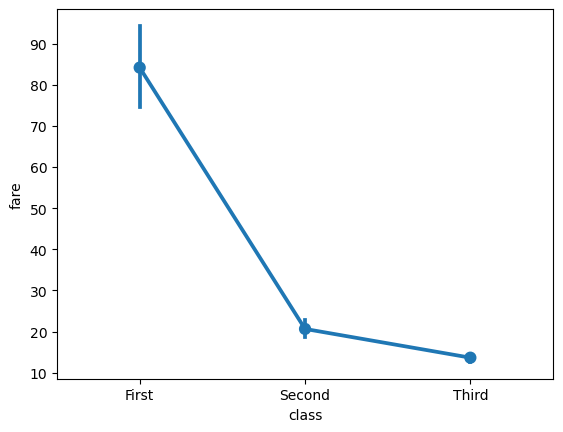

In [18]:
sns.pointplot(x='class',y='fare',data=titanic)

- 포인트플롯은 한 화면에 여러 그래프를 그릴 때 주요.
- 점과 선으로 표현하기 때문에 여러 그래프를 그려도 서로 잘 보이고, 비교하기도 쉬움.
- 계절별 차이.

### 4.4.3 박스플롯(boxplot)
- 박스플롯은 막대 그래프나 포인트플롯보다 더 많은 정보를, 구체적으로 5가지 요약 수치를 제공
- 5가지 요약 수치 : 최솟값, 제1사분위 수(Q1), 제2사분위 수(Q2), 제3사분위 수(Q3), 최댓값
   - 제1사분위 수(Q1) : 전체 데이터 중 하위 25%에 해당하는 값
   - 제2사분위 수(Q2) : 50%에 해당하는 값(중앙값)
   - 제3사분위 수(Q3) : 상위 25%에 해당하는 값
   - 사분위 범위 수(IQR) : Q3-Q1
   - 최댓값 : Q3+(1.5*IQR)
   - 최솟값 : Q1-(1.5*IQR)
   - 이상치 : 최댓값보다 큰 값과 최솟값보다 작은 값

<Axes: xlabel='class', ylabel='age'>

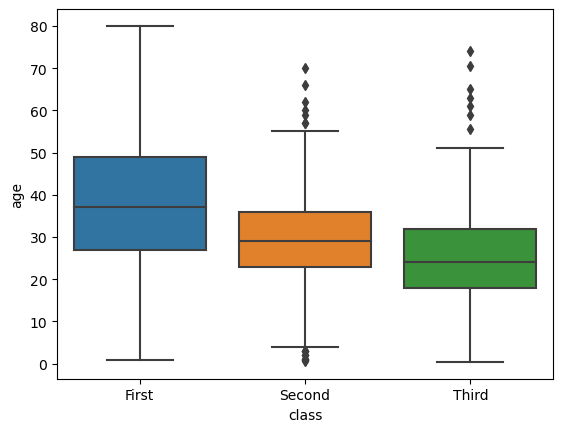

In [19]:
sns.boxplot(x='class',y='age',data=titanic)

### 4.4.4 바이올린플롯(violinplot)
- 바이올린플롯 : 박스플롯과 커널밀도추정 함수 그래프를 합쳐 놓은 그래프
- 막대의 처음 : 최댓값, 막대의 마지막 : 최솟값
- 막대가 없는 부분 : 이상치

<Axes: xlabel='class', ylabel='age'>

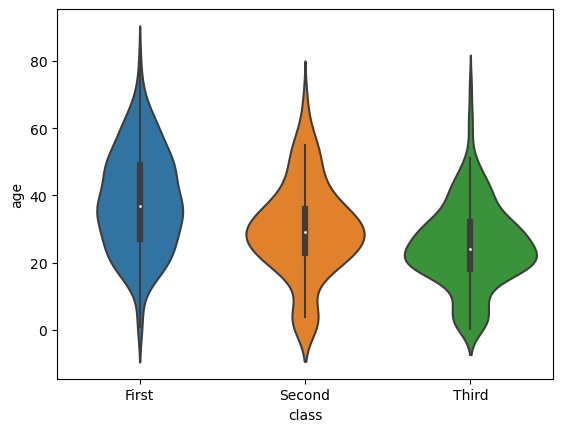

In [20]:
sns.violinplot(x='class',y='age',data=titanic)

- 각 범주별로 5가지 요약 수치를 한눈에 보고 싶다면 : 박스플롯
- 수치형 데이터의 전체적인 분포 양상을 알고 싶다면 : 바이올린 

<Axes: xlabel='class', ylabel='age'>

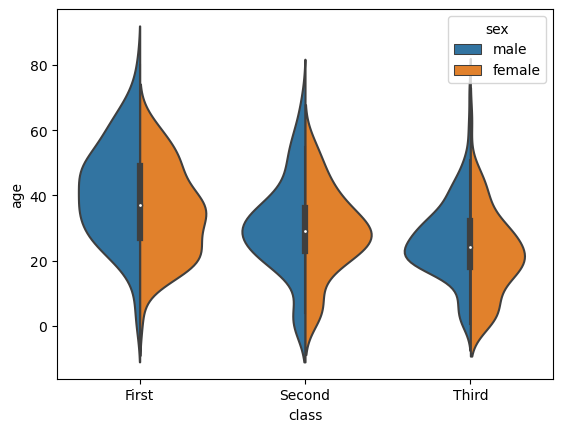

In [21]:
sns.violinplot(x='class',y='age',hue='sex',data=titanic,split=True)

### 4.4.5 카운트플롯(countplot)
- 카운트플롯 : 범주형 데이터의 개수를 확인할 때 사용하는 그래프
- 주로 범주형 피처나 범주형 타깃값의 분포가 어떤지 파악하는 용도

<Axes: xlabel='class', ylabel='count'>

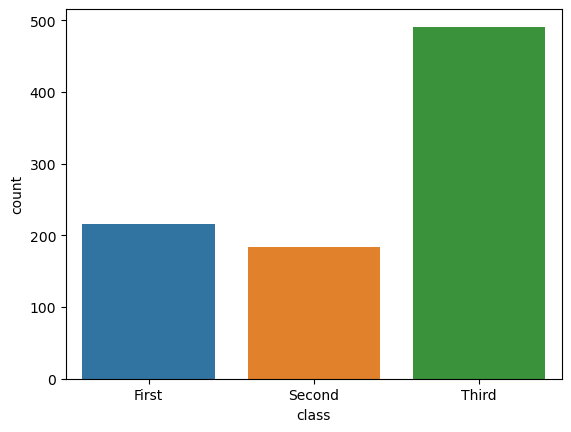

In [22]:
sns.countplot(x='class',data=titanic)

<Axes: xlabel='count', ylabel='class'>

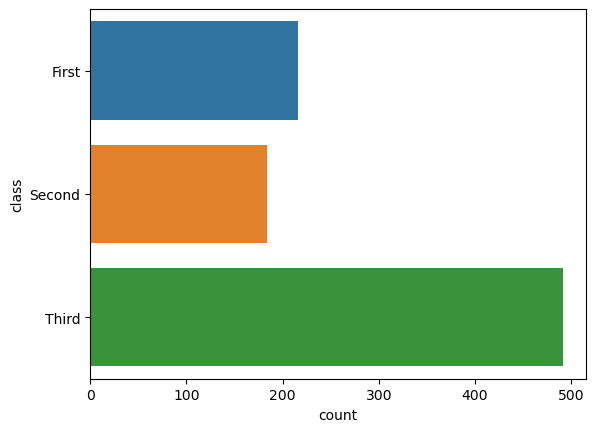

In [23]:
# x 파라미터를 y로 바꾸면 다음과 같이 그래프 방향을 바꿀 수 있음.
sns.countplot(y='class',data=titanic)

#### barplot() vs countplot()
- barplot : 범주형 데이터별 수치형 데이터의 평균
- countplot : 피처를 범주형 데이터 하나만 받기

In [25]:
# sns.barplot(x='class',y='fare',data=titanic) # 막대 그래프
# sns.countplot(y='class',data=titanic) # 카운트 플롯

In [27]:
# barplot()으로 평균이 아닌 중앙값, 최댓값, 최솟값을 구할 수 있음.
# sns.barplot(x='class',y='fare',data=titanic,estimator = np.median) # 중앙값
# sns.barplot(x='class',y='fare',data=titanic,estimator = np.max) # 최댓값
# sns.barplot(x='class',y='fare',data=titanic,estimator = np.min) # 최솟값

### 4.4.6 파이 그래프(pie)
- 파이 그래프 : 범주형 데이터 비율을 알아볼 때 사용하기 좋은 그래프
- seaborn에서는 파이 그래프를 지원하지 않아 matplotlib을 사용해야 함
- x : 비율, y : labels, autopct : 비유을 숫자로 나타낼 수 있음

([<matplotlib.patches.Wedge at 0x7cf1344e3d30>,
 [Text(1.0461621663333946, 0.3399186987098808, 'A'),
  Text(-0.8899187482945419, 0.6465637025335369, 'B'),
  Text(0.6465639524941308, -0.8899185666875186, 'C')],
 [Text(0.5706339089091244, 0.1854101992962986, '10.0%'),
  Text(-0.4854102263424773, 0.3526711104728383, '60.0%'),
  Text(0.35267124681498035, -0.485410127284101, '30.0%')])

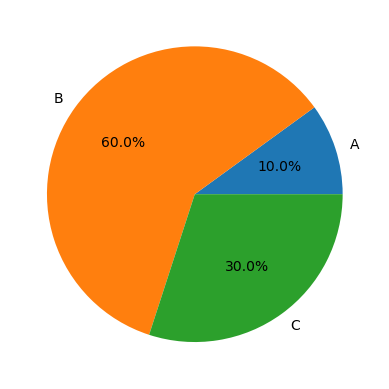

In [28]:
import matplotlib.pyplot as plt

x = [10,60,30] # 범주형 데이터별 파이 그래프를 부채꼴 크기(비율)
labels = ['A','B','C'] # 범주형 데이터 레이블

plt.pie(x=x, labels = labels, autopct='%.1f%%')

## 4.5 데이터 관계 시각화
- 관계도는 여러 데이터 사이의 관계를 살펴보기 위한 그래프

### 4.5.1 히트맵(heatmap)
- 히트맵 : 데이터 간 관계를 색상으로 표현한 그래프
- 비교해야 할 데이터가 많을 때 주로 사용.

In [29]:
# 비행기 탑승자 수 데이터.
# 연도별, 월별 탑승자 수를 나타내는 데이터

flights = sns.load_dataset('flights')

In [30]:
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [31]:
# 판다스의 pivot() 함수를 활용하기.
# pivot() 함수는 index와 columns 파라미터에 전달한 피처를 각각 행과 열로 지정. values 파라미터에 전달한 피처를 합한 표를 반환.

In [32]:
flights_pivot = flights.pivot(index='month',columns='year',values = 'passengers')
flights_pivot

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


<Axes: xlabel='year', ylabel='month'>

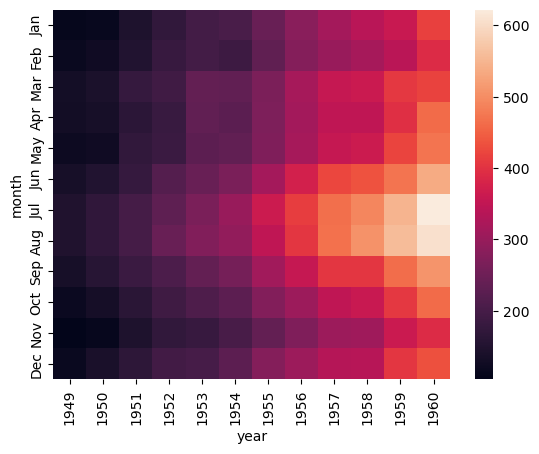

In [33]:
sns.heatmap(data=flights_pivot)

### 4.5.2 라인플롯(lineplot)
- 라인플롯 : 두 수치형 데이터 사이의 관계를 나타낼 때 사용
- x 파라미터에 전달한 값에 따라 y 파라미터에 전달한 값의 평균과 95% 신뢰구간

<Axes: xlabel='year', ylabel='passengers'>

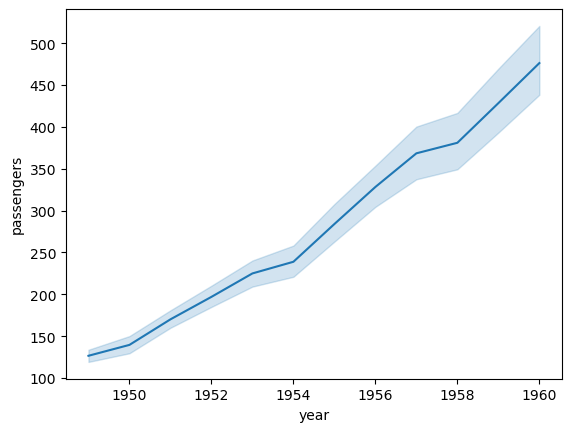

In [34]:
sns.lineplot(x='year',y='passengers',data=flights)

- 실선 주변의 음영은 95% 신뢰구간

### 4.5.3 산점도(scatterplot)
- 산점도 : 두 데이터의 관계를 점으로 표현하는 그래프
- 총 비용과 팁 정보를 모아둔 tips 데이터셋을 활용

In [35]:
tips = sns.load_dataset('tips')

In [36]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<Axes: xlabel='total_bill', ylabel='tip'>

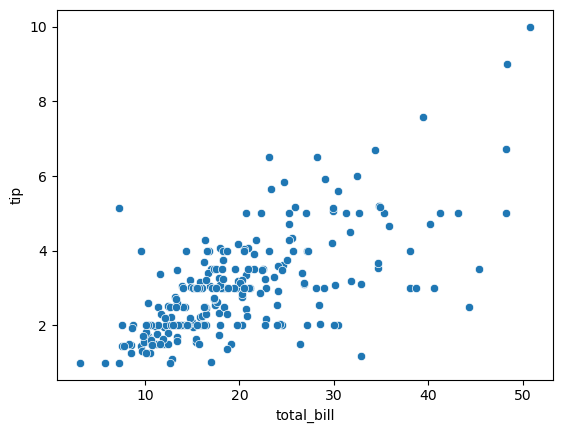

In [38]:
sns.scatterplot(x='total_bill',y='tip',data=tips)

- 총액이 늘면 팁도 따라서 늘고 있음.
- hue 파라미터를 이용하면 산점도를 특정 범주형 데이터별로 나누어 그릴 수 있음.

<Axes: xlabel='total_bill', ylabel='tip'>

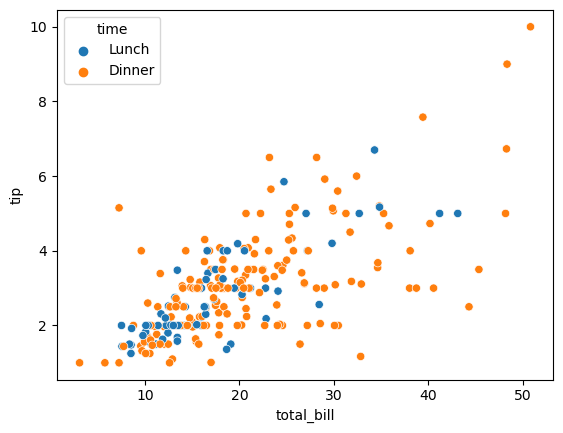

In [39]:
sns.scatterplot(x='total_bill',y='tip',hue='time',data=tips)

### 4.5.4 회귀선을 포함한 산점도 그래프(regplot)
- regplot()은 산점도와 선형 회귀선을 동시에 그려주는 함수
- 회귀선을 그리면 전반적인 상관관계 파악이 좀 더 쉬움

<Axes: xlabel='total_bill', ylabel='tip'>

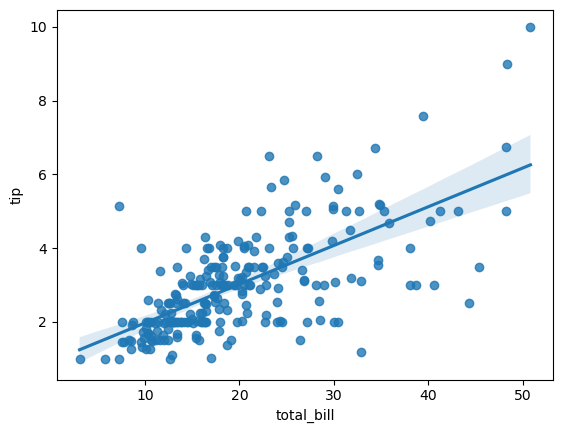

In [40]:
sns.regplot(x='total_bill',y='tip',data=tips)

- 산점도와 함께 선형 회귀선이 나타났음.
- 선형 회귀선 주변 음영은 95% 신뢰구간을 의미.
- 신뢰구간을 99%로 늘리면 ci 파라미터에 99를 전달.

<Axes: xlabel='total_bill', ylabel='tip'>

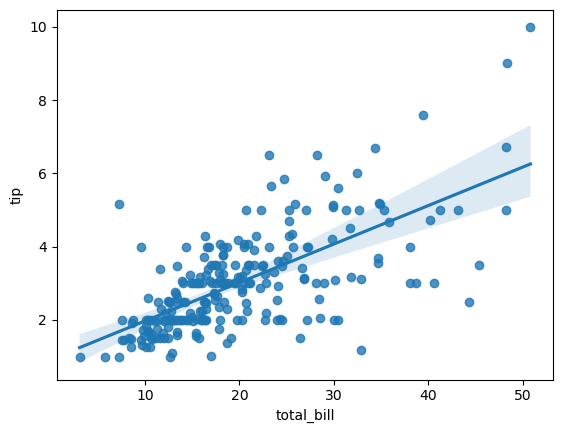

In [41]:
sns.regplot(x='total_bill',y='tip',ci=99,data=tips)